In [316]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [317]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt
import random

Using random seed: 843


/Users/hanna/Documents/GitHub/optimization_project/svm.py:287: RuntimeWarning: divide by zero encountered in scalar divide
  s = 1 - r_min / r_max


τ = 5.4686e-05
Iteration 1: τ = 5.4686e-05, Δα = 8.9443e+01
τ = 2.9227e-09
Iteration 2: τ = 2.9227e-09, Δα = 7.0476e+01
τ = 1.4781e-09
Iteration 3: τ = 1.4781e-09, Δα = 3.1311e-04
τ = 8.8684e-09
Iteration 4: τ = 8.8684e-09, Δα = 1.5835e-04
τ = 2.6087e-07
Iteration 5: τ = 2.6087e-07, Δα = 9.4987e-04
τ = 5.9460e-06
Iteration 6: τ = 5.9460e-06, Δα = 2.7934e-02
τ = 3.5390e-06
Iteration 7: τ = 3.5390e-06, Δα = 6.2970e-01
τ = 9.4868e-09
Iteration 8: τ = 9.4868e-09, Δα = 3.6107e-01
τ = 7.3102e-09
Iteration 9: τ = 7.3102e-09, Δα = 9.4959e-04
τ = 1.1780e-08
Iteration 10: τ = 1.1780e-08, Δα = 7.3168e-04
τ = 2.6582e-08
Iteration 11: τ = 2.6582e-08, Δα = 1.1790e-03
τ = 4.5019e-08
Iteration 12: τ = 4.5019e-08, Δα = 2.6604e-03
τ = 2.8585e-08
Iteration 13: τ = 2.8585e-08, Δα = 4.5051e-03
τ = 1.0370e-08
Iteration 14: τ = 1.0370e-08, Δα = 2.8599e-03
τ = 8.3642e-09
Iteration 15: τ = 8.3642e-09, Δα = 1.0374e-03
τ = 1.2199e-08
Iteration 16: τ = 1.2199e-08, Δα = 8.3670e-04
τ = 2.3113e-08
Iteration 17: τ = 

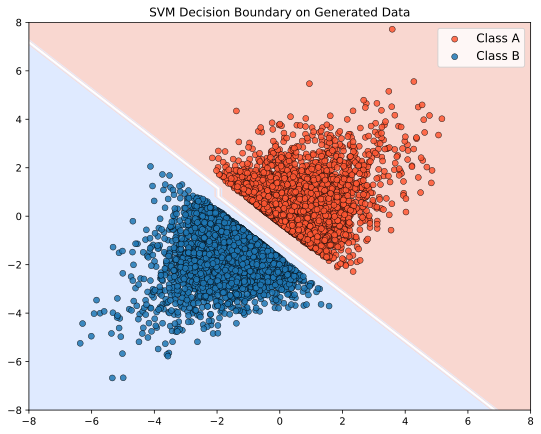

In [318]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 4000
n_B = 4000
margin = 0.5

random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")
#random_seed = 146

listA, listB = TestLinear(w, b, n_A, n_B, margin, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, kernel="linear", lr=0.01, mode="dual", sigma=1.5, s=1.0, max_iter=10000, tol=1e-6)
%time svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)
print("Finished predict")

# Plot the results
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, preds, alpha=0.4, colors=["#AFCBFF", "#F19C8A"])
plt.contour(xx, yy, preds, levels=[0], linewidths=2, colors="white")
plt.scatter(X_A[:, 0], X_A[:, 1], color="#FF5733", label="Class A", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.scatter(X_B[:, 0], X_B[:, 1], color="#1F77B4", label="Class B", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.legend(frameon=True, fontsize=12, loc="upper right")
plt.title("SVM Decision Boundary on Generated Data")
plt.show()